# Make plots of `bhm` and `bhm_e`

For the paper!

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import imageio
import pandas as pd
import seaborn as sns
sns.set(style='ticks')

C:\Users\pfsch\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sys.path.append('../../scripts')

In [3]:
import bicorr as bicorr
import bicorr_e as bicorr_e
import bicorr_plot as bicorr_plot
import bicorr_sums as bicorr_sums
import bicorr_math as bicorr_math

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
os.getcwd()

'C:\\Users\\pfsch\\Box Sync\\Projects\\fnpc\\analysis\\ipol'

# Load data

In [6]:
det_df = bicorr.load_det_df('../../meas_info/det_df_pairs_angles.csv')
det_df.head()

,d1,d2,d1d2,angle
0,1,2,102,15.0
1,1,3,103,30.0
2,1,4,104,45.0
3,1,5,105,60.0
4,1,6,106,75.0


In [7]:
num_fissions = int(sio.loadmat('datap/num_fissions.mat')['num_fissions'])
print(num_fissions)

1000000000


# Time space

In [8]:
load_filename = 'datap/bhp_nn_1ns.npz'
npzfile = np.load(load_filename)
print(npzfile.files)
print(npzfile['note'])

pair_is = npzfile['pair_is']
bhp_nn  = npzfile['bhp_nn']
dt_bin_edges = npzfile['dt_bin_edges']
pair_is = npzfile['pair_is']

['pair_is', 'note', 'bhp_nn', 'dt_bin_edges']
Stored from IPOL simulation file with 1 ns time binning. Pairs are without fc neighbors. -PFS, 7/10/18


In [9]:
norm_factor = num_fissions * len(pair_is) * np.power((dt_bin_edges[1]-dt_bin_edges[0]),2)
bhp = np.sum(bhp_nn,axis=0)/norm_factor

In [10]:
vmin = np.min(bhp[np.nonzero(bhp)])
vmax = np.max(bhp)
print(vmin,vmax)

1.1614401858304297e-12 5.116144018583043e-09


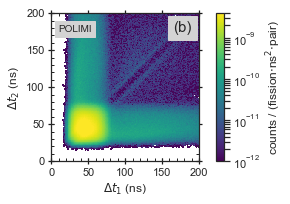

In [14]:
ax= bicorr_plot.bhp_plot(bhp,dt_bin_edges,show_flag = False,
                     vmin = 1e-12, vmax=4e-9,clear=False)
ax.text(10,175,'POLIMI', size=10, backgroundcolor='lightgray')
ax.text(165,175,'(b)',size=15,backgroundcolor='lightgray')
bicorr_plot.save_fig_to_folder('bhm_all_normed')
plt.show()

# Pairs at 15 degrees

Map to with and without fission chamber neighbors.

In [15]:
all_pairs = pair_is
all_pairs.shape

(861,)

In [16]:
with_to_without = dict(zip(all_pairs,np.arange(861)))

In [17]:
pair_is = bicorr.generate_pair_is(det_df, th_min=10, th_max=20, ignore_fc_neighbors_flag=True)
pair_is_without = [with_to_without[pair_is[i]] for i in range(len(pair_is))]

In [18]:
norm_factor = num_fissions * len(pair_is) * np.power((dt_bin_edges[1]-dt_bin_edges[0]),2)
bhp = np.sum(bhp_nn[pair_is_without,:,:],axis=0)/norm_factor

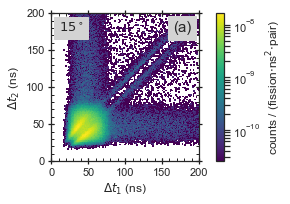

In [19]:
ax = bicorr_plot.bhp_plot(bhp,dt_bin_edges, show_flag=False,
                     clear = False)
ax.text(10,175,'$15^\circ$', size=13, backgroundcolor='lightgray') 
ax.text(165,175,'(a)',size=15,backgroundcolor='lightgray')
bicorr_plot.save_fig_to_folder(fig_filename='bhm_15_normed')
plt.show()

# 45 degrees

In [20]:
pair_is = bicorr.generate_pair_is(det_df, th_min=40, th_max=50, ignore_fc_neighbors_flag=True)
pair_is_without = [with_to_without[pair_is[i]] for i in range(len(pair_is))]

In [21]:
norm_factor = num_fissions * len(pair_is) * np.power((dt_bin_edges[1]-dt_bin_edges[0]),2)
bhp = np.sum(bhp_nn[pair_is_without,:,:],axis=0)/norm_factor

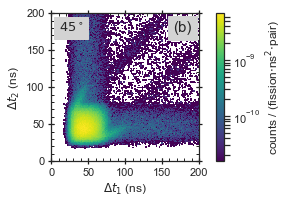

In [22]:
ax = bicorr_plot.bhp_plot(bhp,dt_bin_edges, show_flag=False,
                     clear = False)
ax.text(10,175,'$45^\circ$', size=13, backgroundcolor='lightgray') 
ax.text(165,175,'(b)',size=15,backgroundcolor='lightgray')
bicorr_plot.save_fig_to_folder(fig_filename='bhm_45_normed')
plt.show()

# Energy space

In [23]:
bhm_e, e_bin_edges, note = bicorr_e.load_bhm_e('datap')

In [24]:
bhm_e.shape

(990, 1, 600, 600)

In [25]:
bhp_e, norm_factor = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,pair_is=all_pairs,num_fissions=num_fissions)

In [26]:
vmin = np.min(bhp_e[np.nonzero(bhp_e)])
vmax = np.max(bhp_e)
print(vmin, vmax)

1.8583042973286872e-09 9.161440185830428e-07


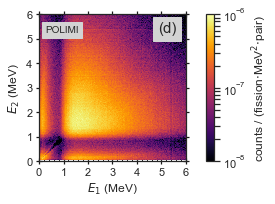

In [30]:
ax = bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, show_flag = False, 
                       vmin = 1e-8, vmax=1e-6, zoom_range =[0,6],
                       clear_flag=False)
ax.text(0.25,5.25,'POLIMI', size=10, backgroundcolor='lightgray') 
ax.text(4.85,5.25,'(d)',size=15,backgroundcolor='lightgray')
bicorr_plot.save_fig_to_folder(fig_filename='bhm_e_all')
plt.show()

## Pairs at 15

In [31]:
pair_is = bicorr.generate_pair_is(det_df, th_min=10, th_max=20, ignore_fc_neighbors_flag=True)

In [32]:
bhp_e, norm_factor = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,pair_is=pair_is,num_fissions=num_fissions)

In [33]:
vmin = np.min(bhp_e[np.nonzero(bhp_e)])
vmax = np.max(bhp_e)
print(vmin, vmax)

3.9999999999999994e-08 6.839999999999999e-06


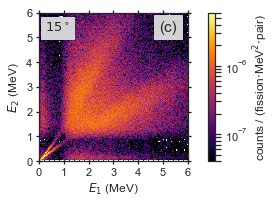

In [34]:
ax = bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, show_flag = False, 
                       vmin = 4e-8, vmax=6e-6, zoom_range =[0,6],
                       clear_flag=False)
ax.text(0.25,5.25,'$15^\circ$', size=13, backgroundcolor='lightgray') 
ax.text(4.85,5.25,'(c)',size=15,backgroundcolor='lightgray')
bicorr_plot.save_fig_to_folder(fig_filename='bhm_e_15')
plt.show()

## Pairs at 45

In [35]:
pair_is = bicorr.generate_pair_is(det_df, th_min=40, th_max=50, ignore_fc_neighbors_flag=True)

In [36]:
bhp_e, norm_factor = bicorr_e.build_bhp_e(bhm_e,e_bin_edges,pair_is=pair_is,num_fissions=num_fissions)

In [37]:
vmin = np.min(bhp_e[np.nonzero(bhp_e)])
vmax = np.max(bhp_e)
print(vmin, vmax)

2.4615384615384612e-08 1.526153846153846e-06


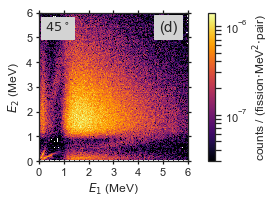

In [38]:
ax = bicorr_plot.bhp_e_plot(bhp_e, e_bin_edges, show_flag = False, 
                       vmin = 3e-8, vmax=1.4e-6, zoom_range =[0,6],
                       clear_flag = False)
ax.text(0.25,5.25,'$45^\circ$', size=13, backgroundcolor='lightgray') 
ax.text(4.85,5.25,'(d)',size=15,backgroundcolor='lightgray')
bicorr_plot.save_fig_to_folder(fig_filename='bhm_e_45')
plt.show()